<a href="https://colab.research.google.com/github/chetanRaJ222/Brain_Tumor_Segmentation_BCP/blob/main/amazon_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk transformers torch pandas matplotlib seaborn scikit-learn


In [ ]:
df = pd.read_csv(
    "Reviews.csv",
    nrows=20000,
    header=0,
    names=['Id','ProductId','UserId','ProfileName',
           'HelpfulnessNumerator','HelpfulnessDenominator',
           'Score','Time','Summary','Text'],
    engine="python"
)

In [ ]:
import pandas as pd

column_names = [
    'Id',
    'ProductId',
    'UserId',
    'ProfileName',
    'HelpfulnessNumerator',
    'HelpfulnessDenominator',
    'Score',
    'Time',
    'Summary',
    'Text'
]

df = pd.read_csv(
    "Reviews.csv",
    names=column_names,
    header=None,
    sep=",",
    engine="python",
    nrows=20000
)

print(df.columns)
print(df[['Text', 'Score']].head())

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
                                                Text  Score
0                                               None    NaN
1  Big fans of this one. The Peanut flavor is som...    5.0
2  I haven't bought this from Amazon yet, but my ...    5.0
3  I think they taste great, and my kids love the...    5.0
4  This is a great single serving meal.  It's not...    5.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading dataset...
Dataset loaded: (19999, 2)
Cleaning text...
Loading Transformer model...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Running sentiment analysis...


100%|██████████| 3000/3000 [05:44<00:00,  8.72it/s]
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result


Classification Report:

              precision    recall  f1-score   support

    negative       0.27      0.93      0.42       425
     neutral       0.00      0.00      0.00       186
    positive       0.96      0.62      0.75      2389

    accuracy                           0.62      3000
   macro avg       0.41      0.51      0.39      3000
weighted avg       0.80      0.62      0.66      3000



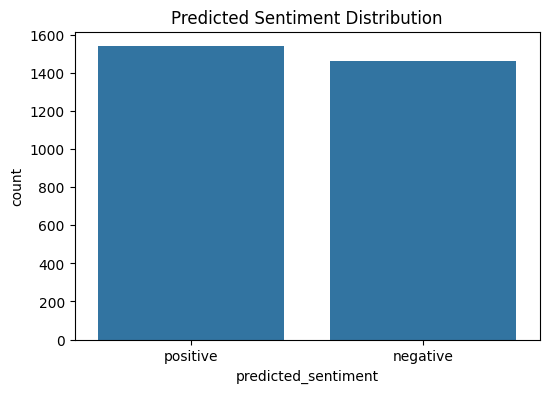


Sample Predictions:
                                                Text true_sentiment  \
1  Big fans of this one. The Peanut flavor is som...       positive   
2  I haven't bought this from Amazon yet, but my ...       positive   
3  I think they taste great, and my kids love the...       positive   
4  This is a great single serving meal.  It's not...       positive   
5  Quite simply, one of the best microwave meals ...       positive   

  predicted_sentiment  confidence  
1            positive    0.934652  
2            positive    0.986729  
3            negative    0.724798  
4            positive    0.999828  
5            positive    0.818602  


In [ ]:
# sentiment_analysis.py

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from transformers import pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# ==========================
# 1. NLTK Setup
# ==========================
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# ==========================
# 2. Load Dataset (LIMIT SIZE)
# ==========================
print("Loading dataset...")
df = pd.read_csv("Reviews.csv", names=column_names, header=None, nrows=20000)

df = df[['Text', 'Score']]
df.dropna(inplace=True)

print("Dataset loaded:", df.shape)

# ==========================
# 3. Convert Ratings to Sentiment
# ==========================
def score_to_sentiment(score):
    if score <= 2:
        return "negative"
    elif score == 3:
        return "neutral"
    else:
        return "positive"

df['true_sentiment'] = df['Score'].apply(score_to_sentiment)

# ==========================
# 4. Text Cleaning using NLTK
# ==========================
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

print("Cleaning text...")
df['clean_text'] = df['Text'].apply(clean_text)

# ==========================
# 5. Load Transformer Model
# ==========================
print("Loading Transformer model...")
sentiment_model = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

# ==========================
# 6. Predict Sentiment
# ==========================
predicted_labels = []
confidence_scores = []

print("Running sentiment analysis...")
for text in tqdm(df['clean_text'][:3000]):  # limit for speed
    result = sentiment_model(text[:512])[0]
    predicted_labels.append(result['label'].lower())
    confidence_scores.append(result['score'])

df = df.iloc[:3000]
df['predicted_sentiment'] = predicted_labels
df['confidence'] = confidence_scores

# ==========================
# 7. Evaluation
# ==========================
print("\nClassification Report:\n")
print(classification_report(df['true_sentiment'], df['predicted_sentiment']))

# ==========================
# 8. Visualization
# ==========================
plt.figure(figsize=(6,4))
sns.countplot(x='predicted_sentiment', data=df)
plt.title("Predicted Sentiment Distribution")
plt.show()

print("\nSample Predictions:")
print(df[['Text', 'true_sentiment', 'predicted_sentiment', 'confidence']].head())